Example 2
=========

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

The data in `data-auto.csv` is a popular dataset of car characteristics. We will be looking at the horsepower and miles per gallon (MPG) obtained by these cars. The model we will consider in this notebook is a simple linear regression:

$$
\text{mpg}_{i} = \alpha + \beta \text{horsepower}_{i} + \epsilon_{i}
$$

where the $\epsilon_{i}$ are IID normal fluctuations. We will estimate the parameters $\alpha$ and $\beta$.

In [23]:
df = pd.read_csv("data-auto.csv")

y = df["mpg"].to_numpy()
x = df["horsepower"].to_numpy()
y_bar = y.mean()
x_bar = x.mean()

### Question

Plot the horsepower and MPG, describe the relationship between these variables.

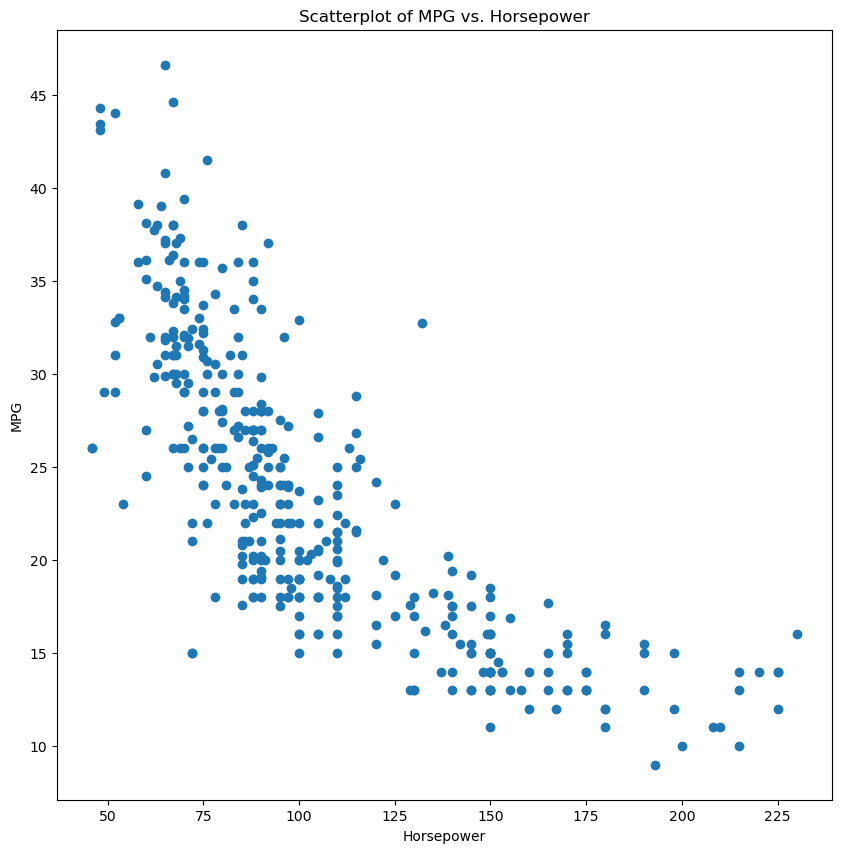

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title("Scatterplot of MPG vs. Horsepower")
plt.show()

The relationship seems to be negative and nonlinear. More horsepower greatly diminishes the MPG in the beginning whereas the effect is

### Question

Using the formula you saw in lectures, calculate the least squares estimates $\hat{\beta}$ and $\hat{\alpha}$

In [21]:
# Calculate least squares regression line #
# add constant to X
X = sm.add_constant(x)
alpha_hat, beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f"{alpha_hat=:.3f}, {beta_hat=:.3f}")

alpha_hat=39.936, beta_hat=-0.158


### Question

Using your parameter estimates, calculate the expected values for the MPG, $\hat{y}_{i}$, and the residuals, $e_{i}$.

In [27]:
expected_MPG = alpha_hat + beta_hat * x
residual_mpg = y - expected_MPG

### Question

Plot the model fit and the residuals. Are the assumptions (linearity, constant variance and independenc) of the model valid? What does the model predict would be the MPG for a car with the power of 400 horses?

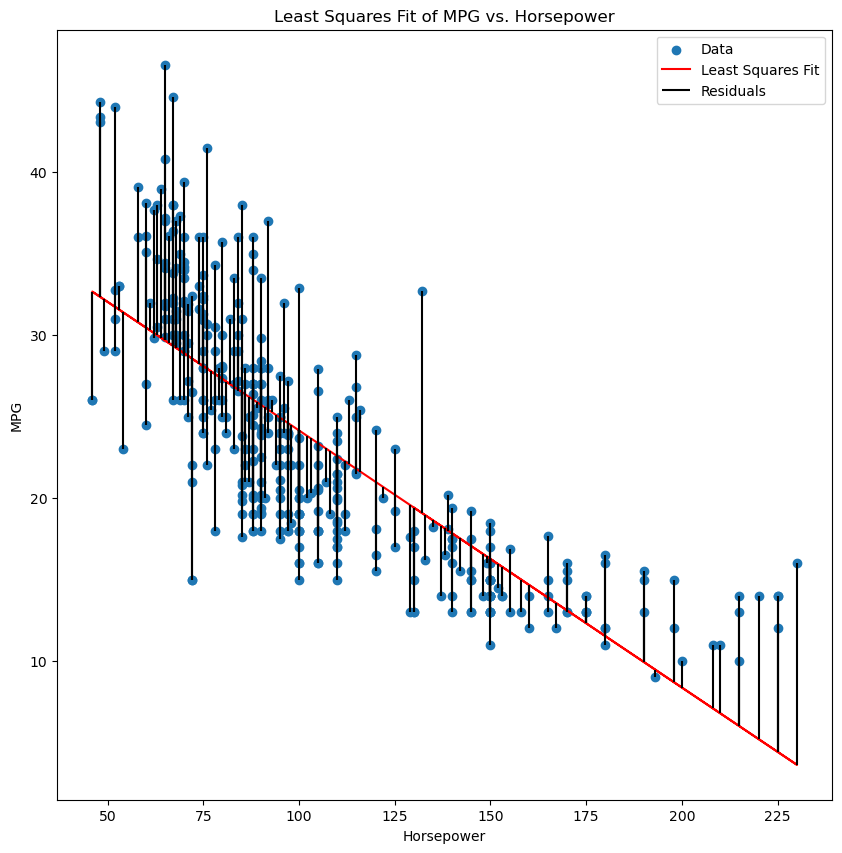

In [29]:
# Plot fit and residuals #
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(x, y, label="Data")
ax.plot(x, expected_MPG, color="red", label="Least Squares Fit")
ax.vlines(x, y, expected_MPG, color="black", label="Residuals")
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title("Least Squares Fit of MPG vs. Horsepower")
ax.legend()
plt.show()


### Question

Calculate the correlation coeffient, and $R^{2}$.

In [31]:
# calculate correlation #
r = np.corrcoef(x, y)[0, 1]

# Calculate R^2 #
R2 = r ** 2

print(f"{r=:.3f}, {R2=:.3f}")

r=-0.778, R2=0.606


### Question

Calculate the confidence intervals on your estimates. Is the result significant?

In [32]:
# calculate confidence interval for beta #
n = len(x)
s2 = np.sum(residual_mpg ** 2) / (n - 2) # empirical variance
s2_beta = s2 / np.sum((x - x_bar) ** 2) # variance of beta hat
beta_hat_se = np.sqrt(s2_beta) # standard error of beta hat
beta_hat_ci = stats.norm.interval(0.95, loc=beta_hat, scale=beta_hat_se) # confidence interval for beta hat
print(f"{beta_hat_ci=}")

beta_hat_ci=(-0.17047768223065057, -0.14521178447665667)


### `statsmodels`

We are finally ready to use the `statsmodel` package. In the following code we perform ordinary least squares regression and print out a summary. You can see that all of the estimates agree with those we calculated above.

In [33]:
my_lm = smf.ols("mpg ~ horsepower", df).fit()
print(my_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           7.03e-81
Time:                        10:16:28   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0